In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CODING DOJO/Códigos/Semana 7/bank_modified.csv')
df.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,y_yes
0,30,1787,79,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
1,33,4789,220,1,339,4,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0
2,35,1350,185,1,330,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0
3,30,1476,199,4,-1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0
4,59,0,226,1,-1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0


In [5]:
X = df.drop(columns = 'y_yes')
y = df['y_yes']

In [25]:
logreg = LogisticRegression(penalty='l2',
                        multi_class='ovr',C = 1000)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)
# Escalar la regresión logística
scaler = StandardScaler()
# Ajustar solo al conjunto de entrenamiento
scaler.fit(X_train)
# Apply transform to both the training set and the test set.
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
# Entrenamiento del modelo con los datos, almacenando la información aprendida de los datos
# Model está aprendiendo la relación entre X e y
logreg.fit(X_train, y_train)


LogisticRegression(C=1000, multi_class='ovr')

In [27]:
print('Score Train:',logreg.score(X_train,y_train))
print('Score Test:',logreg.score(X_test,y_test))

Score Train: 0.8911504424778761
Score Test: 0.8947833775419982


In [31]:
#Probar OvO
log_reg2 = LogisticRegression()
ovo=OneVsOneClassifier(log_reg2)
ovo.fit(X_train, y_train)
print('Training accuracy:', ovo.score(X_train, y_train))
print('Test accuracy:', ovo.score(X_test, y_test))

Training accuracy: 0.8908554572271387
Test accuracy: 0.8947833775419982


In [32]:
# Calcular el AUC para conjuntos de entrenamiento y prueba
print(f'Training AUC: {roc_auc_score(y_train, logreg.predict_proba(X_train)[:,1])}') #[:,1] porque solo quiero la probabilidad de positivos
print(f'Testing AUC: {roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])}')

Training AUC: 0.8589244203777626
Testing AUC: 0.8762273739686922


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


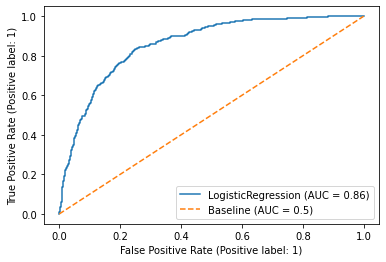

In [35]:
# Visualizar la curva ROC
plot_roc_curve(logreg, X_train, y_train)
plt.plot([0, 1], [0, 1], ls = '--', label = 'Baseline (AUC = 0.5)')
plt.legend();

In [38]:
#Exactitud
y_pred=logreg.predict(X_test)
exactitud=accuracy_score(y_test, y_pred)
exactitud

0.8947833775419982

In [39]:
#Sensibilidad
sens=recall_score(y_test,y_pred)
sens

0.2125984251968504

In [40]:
#Precisión
presicion=precision_score(y_test,y_pred)
presicion

0.5869565217391305

In [41]:
matriz=confusion_matrix(y_test,y_pred)
print(matriz)

[[985  19]
 [100  27]]
